### Условие 1: Задача 1
Общие требования:
+ Постройте график
+ Назовите график
+ Сделайте именование оси x и оси y
+ Сделайте выводы

#### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

df = pd.read_csv(".\kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости

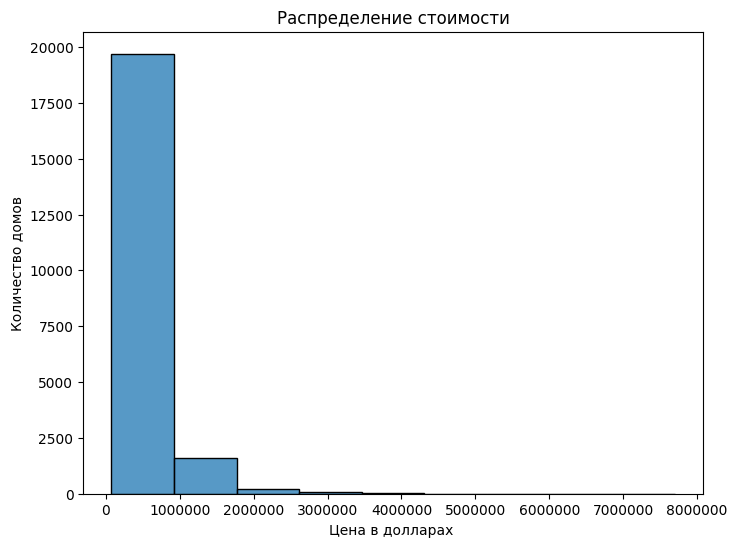

In [2]:
df['price'].astype(int)
plt.figure(figsize=(8,6))

sn.histplot(df['price'] ,bins=9)

plt.title("Распределение стоимости")
plt.xlabel("Цена в долларах ")
plt.ylabel("Количество домов")
#нашел на stackoverflow как убрать научное представление нулей, 
#это метод из ScalarFormatter,который работает без импорта, если только одну ось указывать
plt.ticklabel_format(useOffset=False,style='plain',axis='x')

Видим, что большинство домов находится в пределах до 1,5 млн долларов, будет лучше построить ящик с усами с удалением выбросов

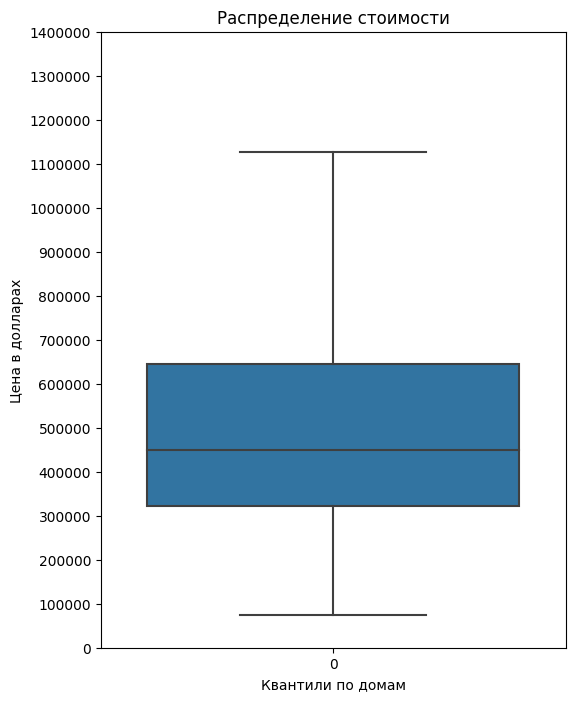

In [3]:
plt.figure(figsize=(6,8))

sn.boxplot(df['price'] ,showfliers=False)

plt.title("Распределение стоимости")
plt.xlabel("Квантили по домам")
plt.ylabel("Цена в долларах")
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.yticks(np.arange(1.5e+6,step=1e+5));


Таким образом, медиана цены равна где-то 450 тыс. долларов, половина всех домов лежит в диапазоне 300-650 тыс.долларов, с небольшим уклоном другой половины в более дорогой сегмент до 1 млн 150 тыс. долларов(медиана ближе к нижней границе ящика)

#### 1.3 Изучите распределение квадратуры жилой

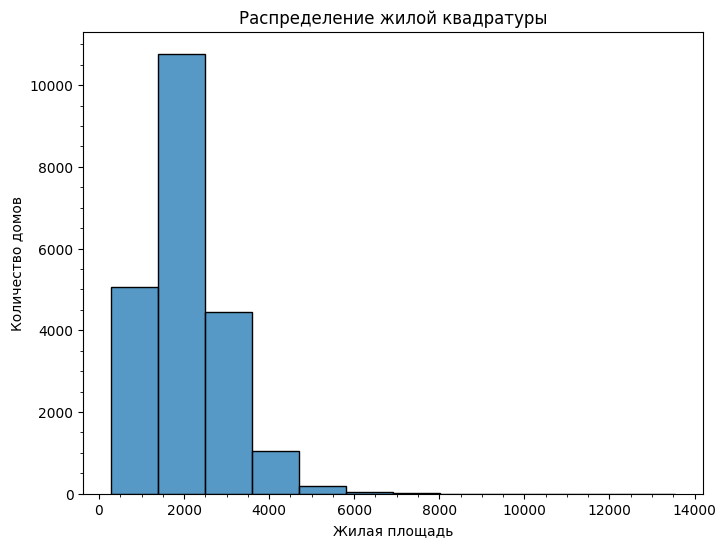

In [4]:

ax = plt.figure(figsize=(8,6))

sn.histplot(df['sqft_living'] ,bins=12)
#здесь заметно, что с малым числом bins точность заметно падает, например, при bins = 9 самый частотный стобец размазывается по двум интервалам
plt.title("Распределение жилой квадратуры")
plt.xlabel("Жилая площадь")
plt.ylabel("Количество домов")
#нашел на stackoverflow как убрать научное представление нулей, 
#это метод из ScalarFormatter,который работает без импорта, если только одну ось указывать
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.minorticks_on()

здесь схожая ситуация с выбросами и ящик с усами будет уместен

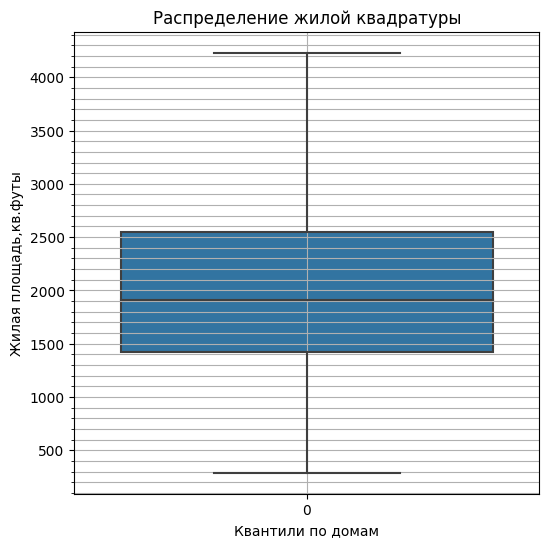

In [5]:
plt.figure(figsize=(6,6))

sn.boxplot(df['sqft_living'] ,showfliers=False)

plt.title("Распределение жилой квадратуры")
plt.xlabel("Квантили по домам")
plt.ylabel("Жилая площадь,кв.футы")
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.minorticks_on()
plt.grid(visible=True,which='both')



Здесь за вычетом выбросов можно судить, что все дома лежат в пределах 200-4200 футов,большая часть  от 1500 до 2500 футов, и кол-во домов на усах более-менее одинаковое(медиана почти в середине), но с большим расбросом 4-го квантиля по квадратуре.

#### 1.4 Изучите распределение года постройки

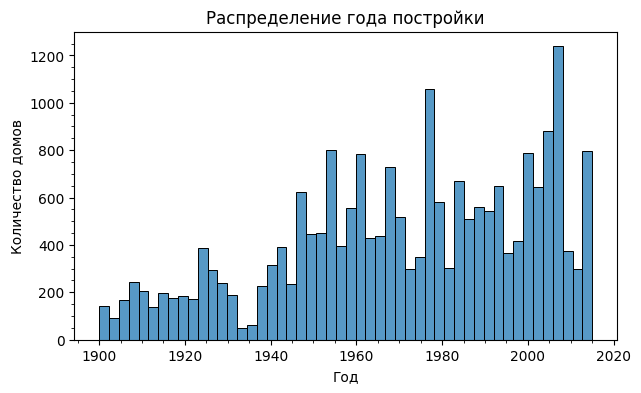

In [6]:
plt.figure(figsize=(7,4))

sn.histplot(df['yr_built'] ,bins=50)

plt.title("Распределение года постройки")
plt.xlabel("Год")
plt.ylabel("Количество домов")
plt.minorticks_on()


Здесь распределение более менее равномерное, с небольшим линейным возрастанием и парой аномалией - мало домов в конце 30-х годов, что совпадает с "Великой депрессией" в США и мировым кризисом. Всплески в конце 80-х(совпадает с НТР и экономическим подъемом 83-89гг) и конце 2010-х (лопнувший пузырь рынка недвижимости, приведший к ипотечному обвалу 2007г и очередному мировому кризису). 

### Условие 2: 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную

In [7]:

water_view = df['waterfront'].value_counts()
water_view


0    21450
1      163
Name: waterfront, dtype: int64

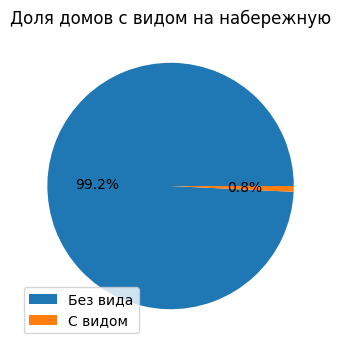

In [8]:
plt.figure(figsize=(6,4))
plt.pie(water_view,autopct='%1.1f%%')
plt.title("Доля домов с видом на набережную")
plt.legend(labels=['Без вида', 'С видом'],loc='lower left');
# handles=[0,1],

Видим, что только маленькая часть домов в датасете расположены на побережье

#### 2.2 Изучите распределение этажей домов
Количество этажей можно принять за категориальный(дискретный) признак, и построить столбчатую диаграмму.
Для начала подсчитаем и немного очеловечим признак этажности.

In [9]:
floors= df['floors'].value_counts().reset_index()
def HumanizeFloors(inp:float) -> str:
    from math import modf
    inp_parts = modf(inp)
    if inp_parts[0] != 0 :
        return f"{int(inp_parts[1])}-этажные с мансардой"
    return f"{int(inp_parts[1])}-этажные"
    
floors.loc[:,'index']= floors['index'].apply(HumanizeFloors)
floors

,index,floors
0,1-этажные,10680
1,2-этажные,8241
2,1-этажные с мансардой,1910
3,3-этажные,613
4,2-этажные с мансардой,161
5,3-этажные с мансардой,8


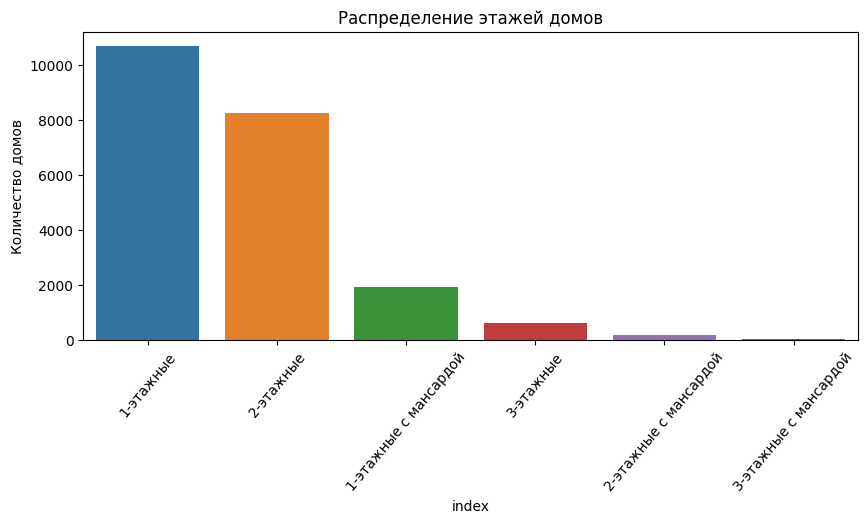

In [10]:
plt.figure(figsize=(10,4))
sn.barplot(x=floors['index'],y=floors['floors']).set(title = "Распределение этажей домов")
plt.ylabel('Количество домов')
plt.xticks(rotation=50);

In [11]:
floor_labels=floors['index'].values.tolist()
floor_labels

['1-этажные',
 '2-этажные',
 '1-этажные с мансардой',
 '3-этажные',
 '2-этажные с мансардой',
 '3-этажные с мансардой']

видим, что самые популярные типы домов не выше 2-х этажей, а постройки выше, скорее всего , дорогие особняки. Проверим гипотезу по признаку цены

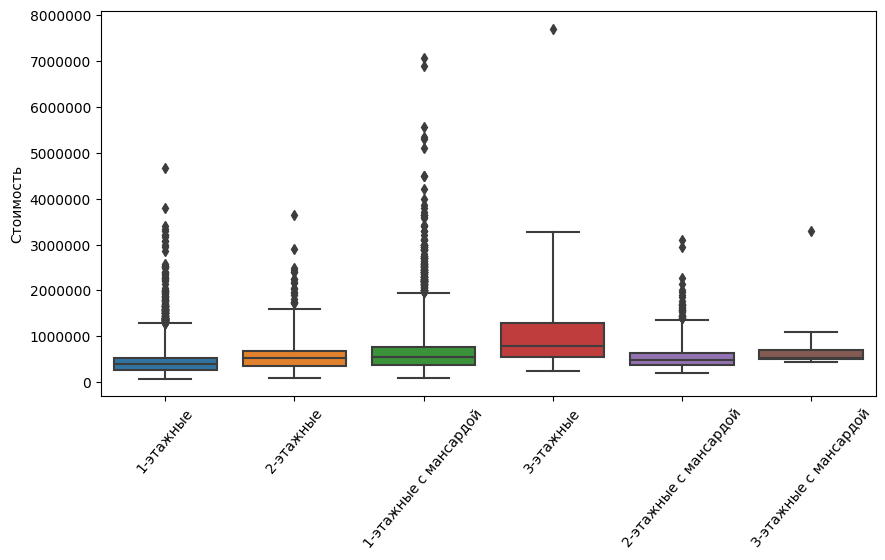

In [12]:
plt.figure(figsize=(10,5))
g = sn.boxplot(x = df['floors'], y = df['price'],whis=3)
plt.ylabel('Стоимость')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
# К сожалению, не нашел как у seaborn настроить метки по осям, пришлось через аттрибуты объекта делать
g.set_xticklabels(floor_labels)
g.set(xlabel=None) 
plt.xticks(rotation=50);



Гипотеза не подтвердилась, ценнники по домам с мансардой оказались довольно схожими с обычными домами, а в более высокой ценовой категории оказались просто 3-х этажные, и много дорогих выбросов среди 1-этажных с мансардой(возможно, из-за престижных районов по-типу Беверли Хилз)

#### 2.3 Изучите распределение состояния домов

Тоже категориальный признак, заменим циферные обозначения на слова перед постройкой столбчатой диаграммы.

In [41]:
#Здесь обойдемся без самопальных функций, и используем встроенный replaсe и словарь значений

conds= {1 : "1:Poor-Worn out", 2 : "2:Fair-Badly worn", 3 : '3:Average', 4 : '4:Good', 5 :'5:Very Good'}
df2 = df.replace({'condition':conds})
df2['condition'].sample(3)

12132    3:Average
10370    3:Average
656         4:Good
Name: condition, dtype: object

In [43]:
df2['condition'].value_counts().sort_index()

3:Average            14031
4:Good                5679
5:Very Good           1701
2:Fair-Badly worn      172
1:Poor-Worn out         30
Name: condition, dtype: int64

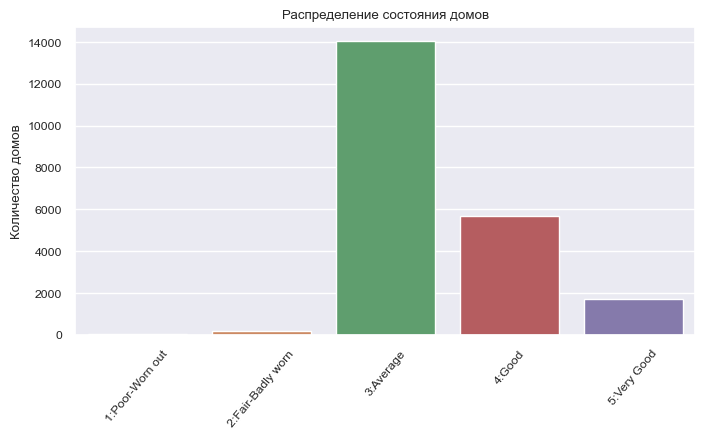

In [45]:
plt.figure(figsize=(8,4))
sn.barplot(x=df2['condition'].value_counts().sort_index().index,y=df['condition'].value_counts().sort_index().values).set(title = "Распределение состояния домов")
plt.ylabel('Количество домов')
plt.xticks(rotation=50);

Большая часть домов получила среднюю оценку состояния дома ,на 2-м и 3-м месте дома с хорошим ремонтом(или новые). 
Дома с плохим состоянием почти не продавались(что логично).


### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Вместо того, чтобы строить графики цены от признака по всем колонкам, лучше сначала выявить, насколько есть зависимость по матрице корреляции, и затем уже построить отдельные графики.

удалим колонки, по которым точно не будет какой-то математической зависимости, это почтовый индекс и идентификатор сделки

In [16]:
# df.drop(columns=['id','zipcode'],inplace=True)
# inplace при повторном запуске ячейки здесь выдает ошибку почему-то, поэтому делаю через присвоение
df3 = df.drop(columns=['id','zipcode'])
df3.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
4154,20150422T000000,631000.0,3,2.25,1670,1396,2.0,0,0,3,9,1250,420,2015,0,47.6814,-122.288,1610,5191


In [17]:
#матрица с округлением точности
price_cor = df3.corr()
price_cor = np.round(price_cor,1)
# price_cor [np.abs(price_cor)< 0.3]= 0

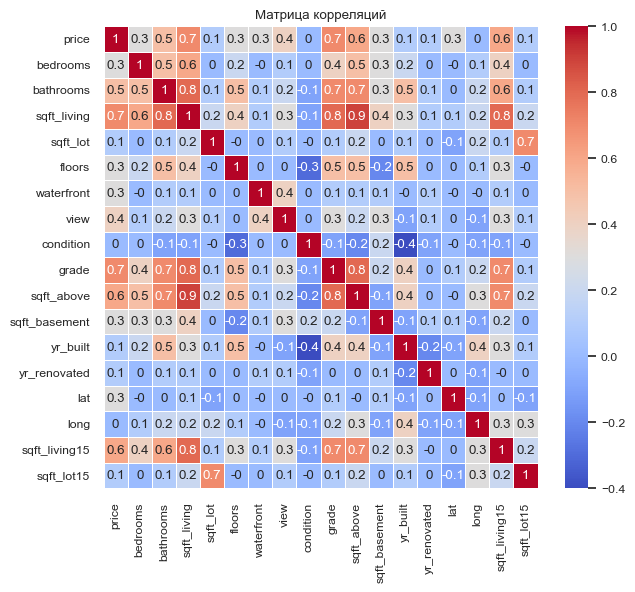

In [18]:
plt.figure(figsize=(7,6))
sn.set(font_scale=0.8)
sn.heatmap(price_cor,annot=True,cmap="coolwarm",linewidths=.5)
plt.title("Матрица корреляций");

Видим, что есть прямые коррелияции от количества ванн, жилой и надземной площади,вида из окна, категории дома, и средней площади по 15-ти соседним домам. По площади графики будут довольно схожими - чем больше площадь, тем больше цена.
Думаю, будет интересно посмотреть графики с более слабой линейной зависимостью, например, состояние ремонта, год постройки и широта-долгота,то есть больше по категориальным признакам.

Но, для общего развития, сделаем совмещенный зависимости график по площадям.

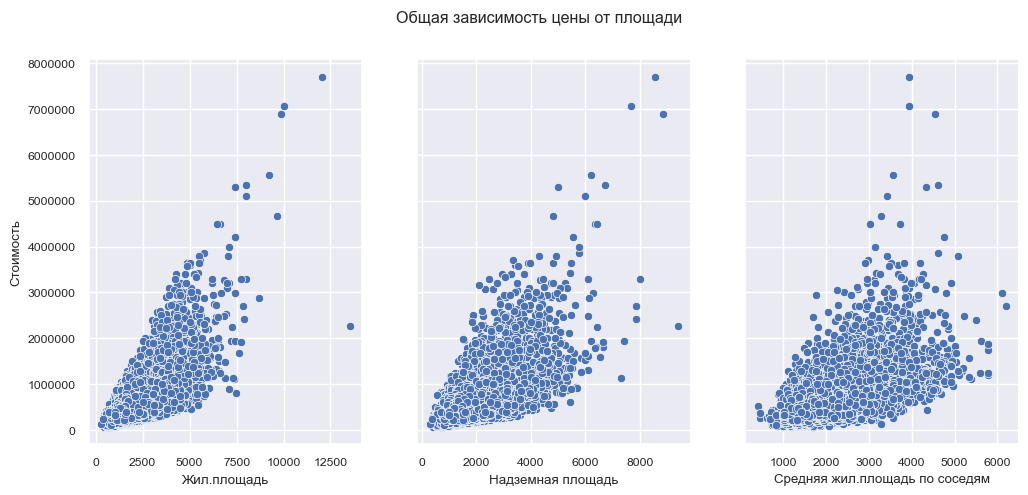

In [22]:
x = df3['price']
fig, axes = plt.subplots(1, 3, figsize=(12,5),sharey=True)
fig.suptitle("Общая зависимость цены от площади")
sn.scatterplot(y=df3['price'], x = df3['sqft_living'],ax=axes[0],legend='full').set_xlabel("Жил.площадь")
axes[0].set_ylabel("Стоимость")
sn.scatterplot(y=df3['price'], x = df3['sqft_above'],ax=axes[1]).set_xlabel("Надземная площадь")
sn.scatterplot(y=df3['price'], x = df3['sqft_living15'],ax=axes[2]).set_xlabel("Средняя жил.площадь по соседям");
plt.ticklabel_format(useOffset=False,style='plain',axis='y')

# df3_select = df3['sqft_living','sqft_above','sqft_living15']
# df3.plot(x='price', y = ['sqft_living','sqft_above','sqft_living15'], kind='scatter');

На графиках видно прямую зависимость по верхнему краю стоимости(коэффициент мы уже знаем по матрице корреляции, это где-то 0.6-0.7), и более широкий градиент цен(больше дешевых предложений) для площадей от 1500 футов. Характер разброса площадей для одной и той же цены очень схож по графикам, просто на левых графиках он кажется меньшим из-за большего масштаба от выбросов.

---

Теперь посмотрим по характеристике ремонта. Это у нас категориальный признак со шкалой от 1 до 5, так что имеет смысл сделать группировку

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [36]:
grouped_cond=df3.groupby('condition').mean()
grouped_cond


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,,,,
1,334431.666667,2.466667,1.175000,1216.000000,22131.066667,1.150000,0.033333,0.300000,5.800000,1144.333333,71.666667,1931.533333,66.400000,47.577257,-122.260567,1802.666667,9940.233333
2,327287.145349,2.831395,1.449128,1410.058140,32502.901163,1.156977,0.005814,0.075581,6.505814,1243.604651,166.453488,1948.941860,45.965116,47.525012,-122.237233,1585.447674,19548.168605
3,542012.578148,3.374171,2.222632,2149.042050,14758.281733,1.620554,0.006486,0.213385,7.826741,1906.819756,242.222293,1979.463117,104.855035,47.564361,-122.202987,2043.879481,12513.670230
4,521200.390033,3.356929,1.900423,1950.991724,16019.821447,1.261138,0.008804,0.263427,7.382462,1590.753830,360.237894,1958.340201,47.509773,47.546711,-122.227555,1901.164642,13701.466984
5,612418.089359,3.460317,2.024397,2022.911229,13052.582011,1.271605,0.011758,0.324515,7.320988,1537.788948,485.122281,1946.448560,43.068195,47.572296,-122.255102,1842.560259,11119.460317


Text(0.5, 0, 'Слева направо от худшего к лучшему ремонту')

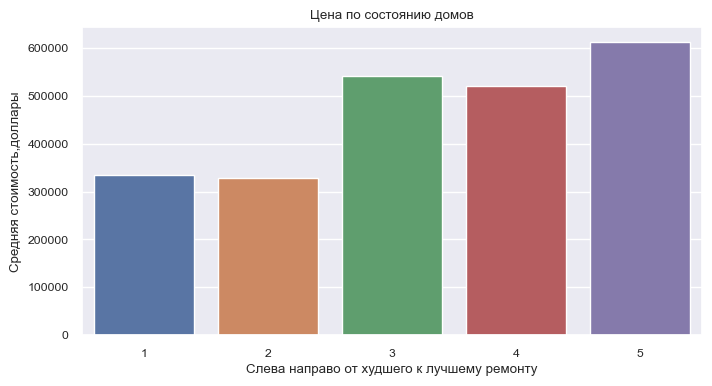

In [38]:
plt.figure(figsize=(8,4))
sn.barplot(x=grouped_cond.index,y=grouped_cond['price']).set(title = "Цена по состоянию домов")
plt.ylabel('Средняя стоимость,доллары')
plt.xlabel('Слева направо от худшего к лучшему ремонту');


Видим что нашу прямую корреляцию смутило - хоть ценники и растут с улучшением состояния дома, но попарно 1-2 и 3-4 очень схожи по средней стоимости. Это обусловлено выбросами, малым набором статистики по группам 1-2, возможно, разбросом предложения, когда другой фактор (например,дешевый регион) перебивает ценник, но только в определенной группе.

---